# This notebook aims to reduce the number of variables we will use for our models. To do this we use both a random forest regressor and KBest algorithms to identify the most relevant variables.  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression
from sklearn.ensemble import RandomForestRegressor
import numpy as np

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)

In [2]:
dataTrain = pd.read_csv('../Data Scraping/DataTrainSet.csv')
features = ['player','pos_x','age_x','team_id_x','g_x','mp_x','fg_per_poss','fga_per_poss','fg_pct_x'
              ,'fg3_per_poss','fg3a_per_poss','fg3_pct_x','fg2_per_poss','fg2a_per_poss','fg2_pct_x','ft_per_poss'
              ,'fta_per_poss','ft_pct_x','orb_per_poss','drb_per_poss','trb_per_poss','ast_per_poss','stl_per_poss'
              ,'blk_per_poss','tov_per_poss','pf_per_poss','pts_per_poss','off_rtg','def_rtg','per','ts_pct'
              ,'fg3a_per_fga_pct','fta_per_fga_pct','orb_pct','drb_pct','trb_pct','ast_pct','stl_pct','blk_pct'
              ,'tov_pct','usg_pct','ows','dws','ws','ws_per_48','obpm','dbpm','bpm','vorp'
              ,'mp_per_g','fg_per_g','fga_per_g','fg3_per_g','fg3a_per_g'
              ,'fg2_per_g','fg2a_per_g','efg_pct','ft_per_g','fta_per_g','orb_per_g','drb_per_g','trb_per_g'
              ,'ast_per_g','stl_per_g','blk_per_g','tov_per_g','pf_per_g','pts_per_g','fg_per_mp','fga_per_mp'
              ,'fg3_per_mp','fg3a_per_mp','fg2_per_mp','fg2a_per_mp','ft_per_mp','fta_per_mp','orb_per_mp'
              ,'drb_per_mp','trb_per_mp','ast_per_mp','stl_per_mp','blk_per_mp','tov_per_mp','pf_per_mp','pts_per_mp'
              ,'votes_first','points_won']

feat = features[4:-2]
XTrainDF = dataTrain[feat]
XTrainDF = XTrainDF.fillna(0)

XTrain = XTrainDF.to_numpy()
yTrain = dataTrain['points_won'].to_numpy()

In [3]:
regressor = RandomForestRegressor(n_estimators = 200)
regressor.fit(XTrain, yTrain)
sorted_indices_reg = np.argsort(regressor.feature_importances_)[::-1]

selector = SelectKBest(mutual_info_regression, k=5)
best_feat = selector.fit_transform(XTrain, yTrain)
sorted_indices_K = np.argsort(selector.scores_)[::-1]

score_sum = np.zeros_like(selector.scores_)

for index in range(len(feat)):
    score_sum[index]=selector.scores_[index]/np.max(selector.scores_)+regressor.feature_importances_[index]/np.max(regressor.feature_importances_)

In [4]:
sorted_indices = np.argsort(score_sum)
for index in sorted_indices: 
    print(f"{feat[index]}: {score_sum[index]:.4f}")

stl_per_poss: 0.0037
blk_pct: 0.0038
fg3_per_g: 0.0047
orb_per_poss: 0.0053
tov_per_mp: 0.0078
trb_per_poss: 0.0169
fg3a_per_mp: 0.0175
orb_pct: 0.0228
trb_pct: 0.0229
fg3_pct_x: 0.0232
fg3a_per_poss: 0.0263
fta_per_fga_pct: 0.0267
blk_per_mp: 0.0274
blk_per_poss: 0.0333
ft_pct_x: 0.0397
orb_per_mp: 0.0421
tov_pct: 0.0475
fg3_per_poss: 0.0493
trb_per_mp: 0.0524
ast_per_poss: 0.0601
off_rtg: 0.0620
tov_per_poss: 0.0675
fg3a_per_fga_pct: 0.0789
drb_per_mp: 0.0851
fg3a_per_g: 0.0852
stl_pct: 0.0861
drb_pct: 0.0894
ast_per_mp: 0.0895
fg3_per_mp: 0.0999
stl_per_mp: 0.1006
fg_pct_x: 0.1008
efg_pct: 0.1179
pf_per_mp: 0.1209
ast_pct: 0.1272
def_rtg: 0.1294
fg2a_per_mp: 0.1304
pf_per_poss: 0.1345
dbpm: 0.1360
ts_pct: 0.1385
fg2_pct_x: 0.1537
drb_per_poss: 0.1584
orb_per_g: 0.1700
blk_per_g: 0.1893
g_x: 0.1977
fga_per_mp: 0.2104
ft_per_mp: 0.2133
pf_per_g: 0.2141
ft_per_poss: 0.2362
fg2a_per_poss: 0.2446
fta_per_poss: 0.2453
fta_per_mp: 0.2539
fg_per_mp: 0.2671
fg2_per_mp: 0.2672
usg_pct: 0.2709

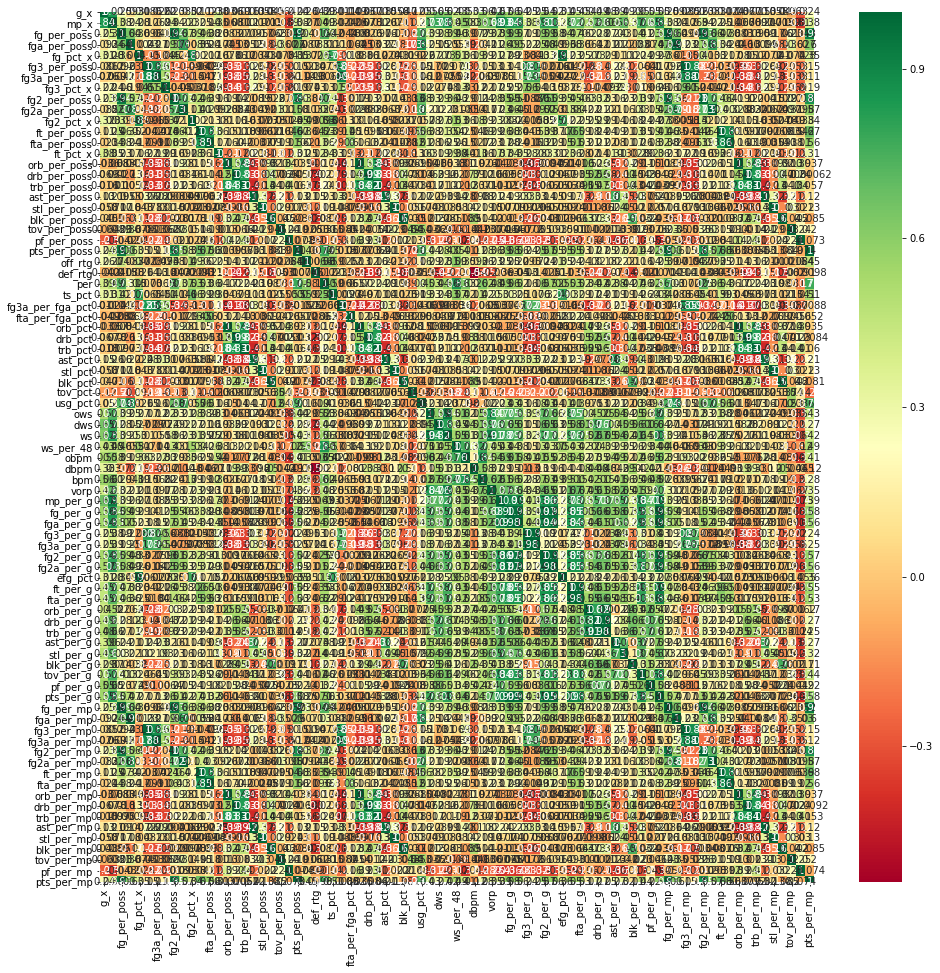

In [5]:
import seaborn as sns

fig = plt.figure(figsize=(16, 16))

fig.set_facecolor('white')

sns.heatmap(XTrainDF.corr(), annot=True, cmap="RdYlGn")